# 각 요소들의 상관관계

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# altair 라이브러리 사용
!pip install altair
import altair as alt

plt.rcParams['figure.figsize'] = (10, 6) # 그래프 크기 설정

In [12]:
검진정보 = pd.read_csv(
    "./검진정보.csv",
)
심장질환 = pd.read_csv(
    "./심장질환.csv"
)

## 연령대 & 성별 별 BMI

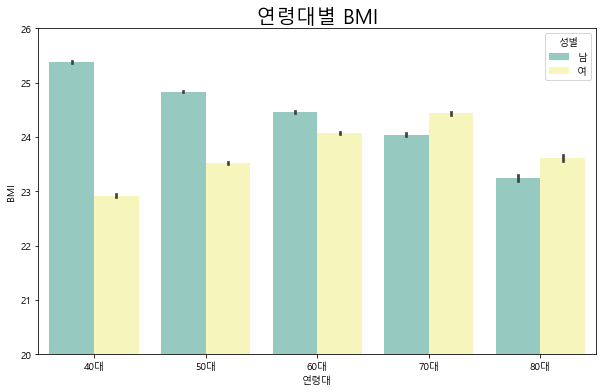

In [9]:
#연령대, 성별 BMI(순서 수정)

sns.barplot(x=검진정보["연령대"], 
            y=검진정보["BMI"], 
            hue=검진정보["성별"],
            order=["40대","50대","60대","70대","80대"],
           palette= "Set3")

plt.ylim(20,26)
plt.title("연령대별 BMI", size = 20)
plt.show()

# 연령대별 남녀의 비만정도 인원 수

In [17]:
df = 검진정보.groupby(["연령대","성별","비만정도"]).count()
df.reset_index(inplace=True)
df["사람 수"]=df["기준년도"]
df.drop(df.loc[:,"기준년도":"BMI"],axis=1,inplace=True)

bars = alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('성별:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람 수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('비만정도:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#96ceb4', '#ffcc5c','#ff6f69', '#e377c2','#17becf'],
            ),
        )
)\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )
bars.title="나이대별 남녀 비만정도 인원 수"

bars

alt.Chart(...)

## BMI 와 수축기 혈압, 이완기 혈압의 관계 플롯

In [5]:
df1=검진정보.copy()
df1=df1.dropna(axis=0, subset="수축기 혈압")
df1=df1.dropna(axis=0, subset="이완기 혈압")
df1["BMI"]=df1["BMI"].round(2)

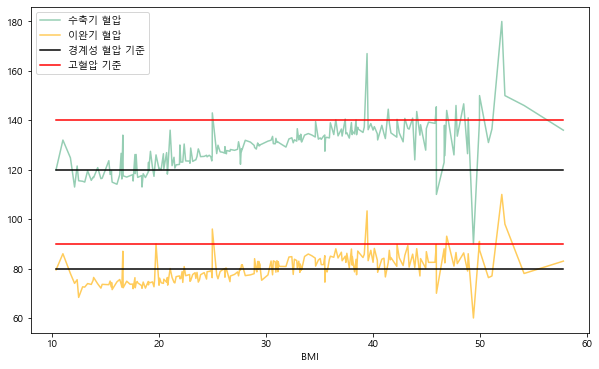

In [10]:
sns.lineplot(x=df1.groupby("BMI").mean().index, y = df1.groupby("BMI")["수축기 혈압"].mean().values, label="수축기 혈압", color="#96ceb4")
sns.lineplot(x=df1.groupby("BMI").mean().index, y = df1.groupby("BMI")["이완기 혈압"].mean().values, label="이완기 혈압", color="#ffcc5c")
sns.lineplot(x=df1.groupby("BMI").mean().index, y = 120, color="black", label="경계성 혈압 기준")
sns.lineplot(x=df1.groupby("BMI").mean().index, y = 80, color="black")
sns.lineplot(x=df1.groupby("BMI").mean().index, y = 140, color="red", label="고혈압 기준")
sns.lineplot(x=df1.groupby("BMI").mean().index, y = 90, color="red")
plt.show()

### BMI 가 증가할수록 수축기 혈압과 이완기 혈압이 증가하는 모습을 표현했습니다.
경계성 혈압기준과 고혈압 기준선을 플롯하였고, 이 선을 초과할수록 혈압이 정상범위를 벗어나는 것입니다. BMI가 증가할수록 기준선을 초과하는 수가 증가하는것을 볼 수 있습니다.

# BMI 수치에 따른 콜레스테롤 수치 비교

### 우상향을 그릴 것이라는 예상과는 다르게 일정한 양상을 보인다.

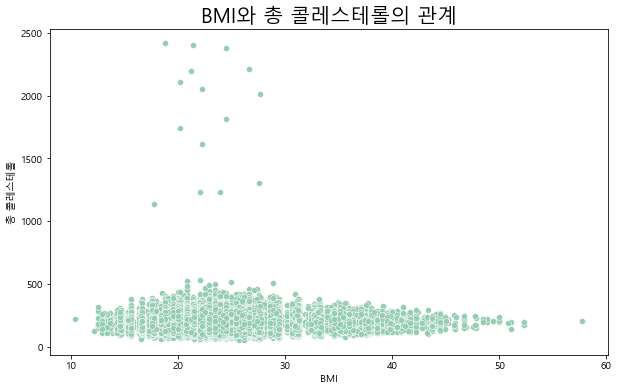

In [13]:
sns.scatterplot(x=심장질환["BMI"], y=심장질환["총 콜레스테롤"], color="#96ceb4")
plt.title("BMI와 총 콜레스테롤의 관계", size=20)
plt.show()

# BMI와 HDL콜레스테롤, 트리글리세라이드의 관계

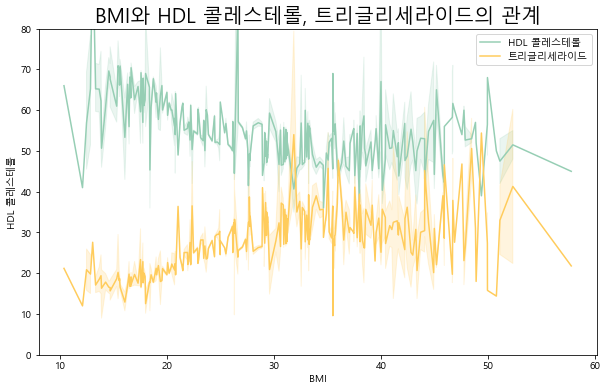

In [14]:
sns.lineplot(x=심장질환["BMI"], y=심장질환["HDL 콜레스테롤"], color="#96ceb4", label="HDL 콜레스테롤")
sns.lineplot(x=심장질환["BMI"], y=심장질환["트리글리세라이드"]/5, color="#ffcc5c", label="트리글리세라이드")
plt.ylim(0,80)
plt.title("BMI와 HDL 콜레스테롤, 트리글리세라이드의 관계", size=20)
plt.show()

- 총 콜레스테롤이 우상향일 것이라는 예상과는 다르게 일정하게 나오는 것에 의문이 들었습니다.
- 그래서 HDL 콜레스테롤과 트리글리세라이드를 플롯해보니
- BMI가 증가할수록 HDL 콜레스테롤과 트리글리세라이드는 반비례 관계를 보였습니다.
- 이러한 이유로 총 콜레스테롤은 일정한 것 같습니다.

# 연령대별 남녀의 혈색소 수치

- 나이가 증가할수록 혈색소 수치가 감소하는 것을 볼 수 있다.
- 단, 여성의 경우 생리로 인해 남성보다 혈색소 수치가 낮은데 40대에서 50대에는 
- 혈색소 수치가 증가한다. 이는 50대 여성부터 폐경으로 인해 혈색소 수치가 증가한 것으로
- 추측할 수 있고, 그 이후로는 남성과 마찬가지로 혈색소 수치가 감소하는 것을 볼 수 있다.


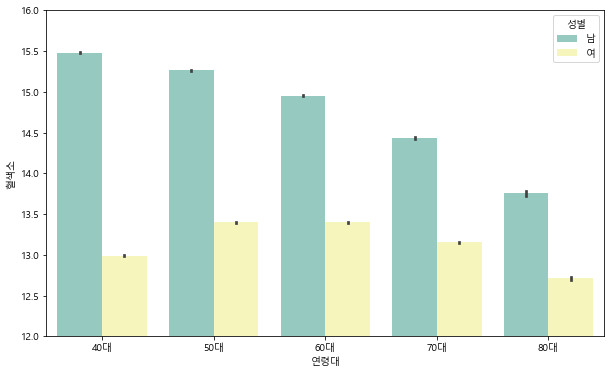

In [15]:
sns.barplot(x=검진정보["연령대"], y=검진정보["혈색소"], hue=검진정보["성별"], order=["40대","50대","60대","70대","80대"],palette="Set3")
plt.ylim(12,16)
plt.show()

# 연령대별 남녀 신장질환 인원수

In [21]:
df = 검진정보.groupby(["연령대","성별","신장질환"]).count()
df.reset_index(inplace=True)
df["사람 수"]=df["기준년도"]
df.drop(df.loc[:,"기준년도":"BMI"],axis=1,inplace=True)

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('성별:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람 수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('신장질환:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#ff6f69', '#ffcc5c', '#96ceb4', '#e377c2','#17becf'],
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

# 연령대별 남녀 당뇨 인원수

In [23]:
df = 검진정보.groupby(["연령대","성별","당뇨"]).count()
df.reset_index(inplace=True)
df["사람 수"]=df["기준년도"]
df.drop(df.loc[:,"기준년도":"BMI"],axis=1,inplace=True)

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('성별:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람 수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('당뇨:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#ff6f69', '#ffcc5c', '#96ceb4', '#e377c2','#17becf'],
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

# 신장질환 여부에 따른 간수치 확인
- 신장질환이 있는 비정상군의 ALT 수치
- 중년층에서는 신장질환이 있는 사람들이 간수치도 높다(정상,위험군 보다)

(15.0, 35.0)

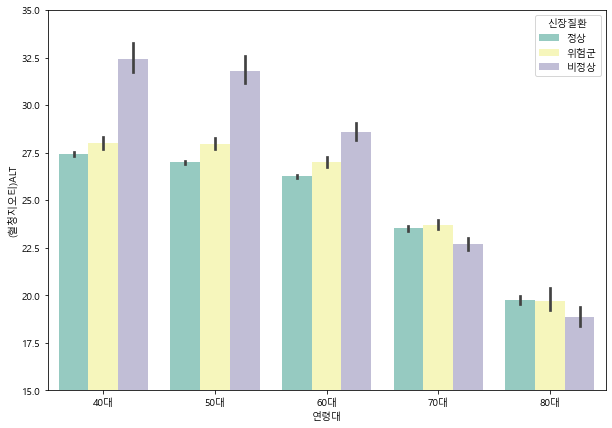

In [29]:
plt.figure(figsize=(10, 7))
sns.barplot(data=검진정보, 
            x="연령대", y="(혈청지오티)ALT", 
            hue="신장질환",palette='Set3',
           order=['40대','50대','60대','70대','80대'])

plt.xlabel("연령대")
plt.ylabel("(혈청지오티)ALT")
plt.ylim(15,35)

# 당뇨병 환자의 LDL콜레스테롤 수치

- 일반적으로 당뇨병환자의 적정LDL콜레스테롤 치료목표는 100mg/dl 미만으로 권고
- LDL콜레스테롤은 혈관에 침착돼 심혈관질환 위험을 높이는 나쁜 콜레스테롤로 수치가 높아지지 않도록 적정 관리가 필요함  
- 60~80대 당뇨병환자들의 LDL 콜레스테롤이 100 미만으로 유지되는 것으로 보아 약물치료 및 당뇨 관리가 되고 있음을 확인 가능


<AxesSubplot:xlabel='연령대', ylabel='LDL 콜레스테롤'>

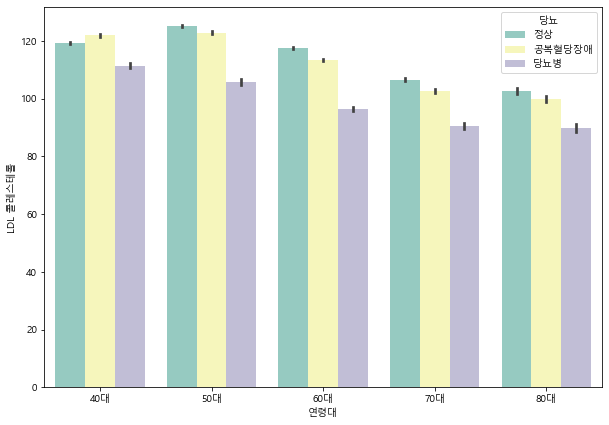

In [32]:
plt.figure(figsize=(10, 7))
sns.barplot(data=검진정보, x="연령대", y="LDL 콜레스테롤", 
            hue="당뇨",palette='Set3',
           order=['40대','50대','60대','70대','80대'])

# 흡연여부에 따른 성별-연령대 분포

In [33]:
#흡연상태 변환
def 흡연_변환(x):
    x=x['흡연상태']
    if x==1:
        return "비흡연자"
    elif x==2:
        return "구흡연자"
    elif x==3:
        return "흡연자"

검진정보["흡연상태"] = 검진정보.apply(흡연_변환,axis=1)

In [39]:
df = 검진정보.groupby(["연령대","성별","흡연상태"]).count()
df.reset_index(inplace=True)
df["사람 수"]=df["기준년도"]
df.drop(df.loc[:,"기준년도":"간질환"],axis=1,inplace=True)

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('성별:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람 수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('흡연상태:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#ffcc5c', '#96ceb4','#ff6f69', '#e377c2','#17becf'],
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

# 음주여부에 따른 성별-연령대 분포

In [40]:
#음주여부 변환
def 음주_변환(x):
    x=x['음주여부']
    if x==1:
        return "음주자"
    elif x==0:
        return "비음주자"

검진정보["음주여부"] = 검진정보.apply(음주_변환,axis=1)

In [47]:
df = 검진정보.groupby(["연령대","성별","음주여부"]).count()
df.reset_index(inplace=True)
df["사람 수"]=df["기준년도"]
df.drop(df.loc[:,"기준년도":"간질환"],axis=1,inplace=True)

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('성별:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람 수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('음주여부:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=[ '#96ceb4','#ff6f69','#e377c2','#17becf'],
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)